In [5]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/Data Science/IU2241230382/Global_Space_Exploration_Dataset.csv'
df = pd.read_csv(file_path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Countries,Duration (in Days)
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,"France, UK, Russia",112
1,Japan,2018,Re-engineered composite flexibility,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,"Germany, Israel",236
2,Israel,2013,Reactive disintermediate projection,Manned,Port Kaitlynstad,Communication,28.73,54,AI Navigation,Medium,"China, Israel, USA",238
3,UAE,2010,Grass-roots 6thgeneration implementation,Unmanned,Mariastad,Spy,37.27,58,Traditional Rocket,Low,USA,186
4,India,2006,Balanced discrete orchestration,Manned,North Jasonborough,Weather,18.95,91,Solar Propulsion,Medium,"Israel, China, India",277
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,China,2023,Synergistic scalable intranet,Manned,East Shawna,Spy,22.11,68,Traditional Rocket,Medium,Israel,338
2996,France,2009,Team-oriented value-added extranet,Manned,Douglasborough,Communication,47.72,96,Nuclear Propulsion,Medium,"Germany, Israel, UK",336
2997,India,2020,Face-to-face even-keeled matrix,Unmanned,Bellhaven,Weather,14.58,83,Reusable Rocket,Low,"Japan, Russia, France",3
2998,Russia,2002,Open-source secondary software,Manned,Deniseview,Weather,13.69,66,Solar Propulsion,Low,"UAE, India, France",339


Success Rate by Mission Type:

Manned: 75.23%
Unmanned: 74.73%
Country with Highest Average Success Rate:
Germany: 76.25%

Top 5 Countries by Success Rate:

Country
Germany    76.248000
India      75.765306
France     75.463023
Russia     75.252595
UK         75.043478
Name: Success Rate (%), dtype: float64


/tmp/ipython-input-6-2451544923.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_countries.values, y=top_5_countries.index, palette='Blues_r')


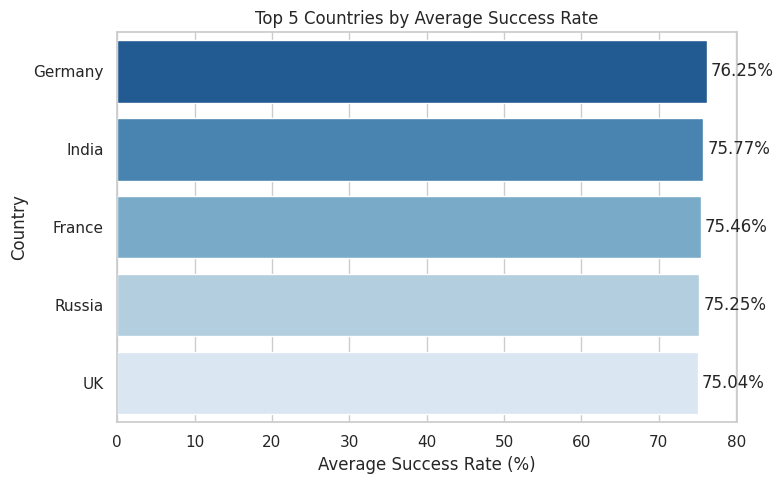

/tmp/ipython-input-6-2451544923.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='Duration (in Days)', palette='Set2')


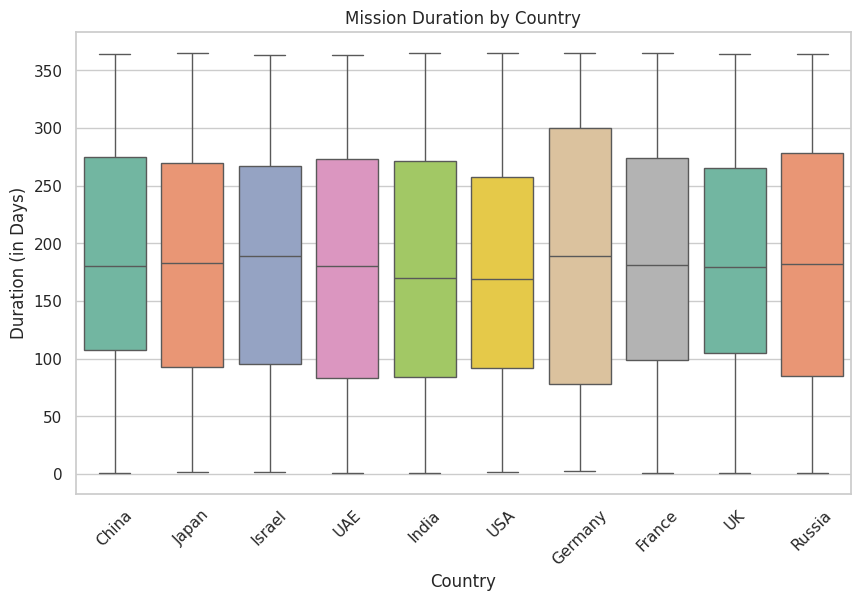

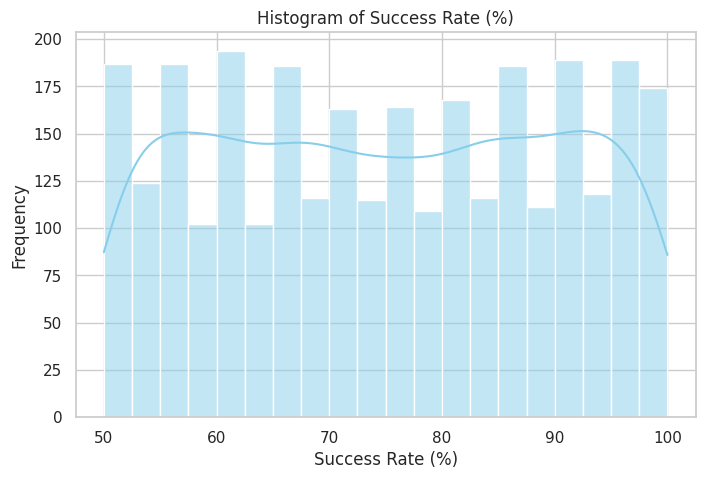

/tmp/ipython-input-6-2451544923.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mission Type', y='Budget (in Billion $)', data=df, palette='pastel')


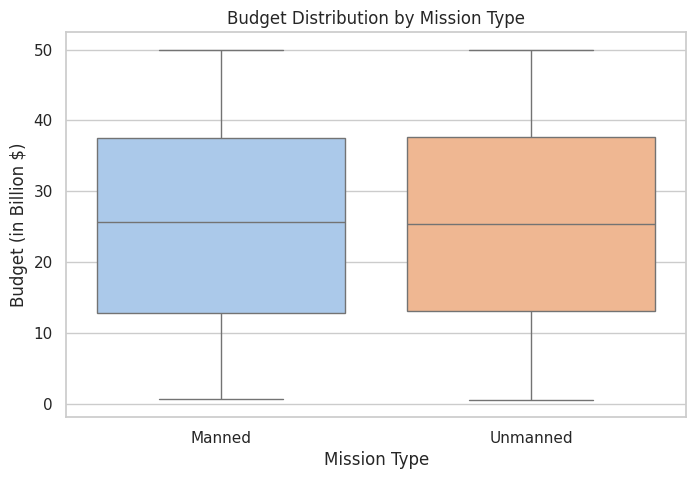

4️. Key Insights:
- Germany has the highest average success rate of 76.25%
- Countries with higher budgets don't always guarantee high success.
- Some mission types (like manned) tend to have higher budgets.
- Environmental impact & technology may influence success, worth exploring further.
- Mission Type Success Rates
   Manned Missions: ~75.23% success rate
   Unmanned Missions: ~74.73% success rate
 Both types show nearly similar reliability.


'\n1. Graphs (Visualizations)\n- Histogram of Success Rate\n - Shows how frequently different success rates appear.\n - Helps identify distribution (normal, skewed, etc.).\n - You might see if most missions are generally successful or not.\n- Boxplot of Budget by Mission Type\n - Visualizes distribution, median, and outliers.\n - Helps compare Manned vs Unmanned missions:\n   - Are manned missions more expensive?\n   - Is there more variability in costs?\n\n2. Final Analysis Summary\n - Key Takeaways:\n    - Germany has the highest average success rate of 76.25%\n    - Higher budgets may not always lead to higher success rates.\n    - Mission type plays a role in cost and perhaps success.\n    - Some countries/collaborations tend to have more consistent or high-performing missions.\n    - Environmental impact and technology might be potential predictors in future models.\n    - Mission Type Success Rates\n      - Manned Missions: ~75.23% success rate\n      - Unmanned Missions: ~74.73%

In [6]:
df.head()

num_cols = ['Budget (in Billion $)', 'Success Rate (%)', 'Duration (in Days)']

df = df.dropna(subset=['Mission Type', 'Success Rate (%)'])

# Group by 'Mission Type' and calculate average success rate
success_rate = df.groupby('Mission Type')['Success Rate (%)'].mean()

# Print the results
print("Success Rate by Mission Type:\n")
for mission_type, rate in success_rate.items():
    print(f"{mission_type}: {rate:.2f}%")

df = df.dropna(subset=['Country', 'Success Rate (%)'])

# Group by Country and calculate average success rate
country_success = df.groupby('Country')['Success Rate (%)'].mean()

# Sort descending to get the highest
country_success_sorted = country_success.sort_values(ascending=False)

# Display top country
top_country = country_success_sorted.idxmax()
top_success_rate = country_success_sorted.max()

print(f"Country with Highest Average Success Rate:")
print(f"{top_country}: {top_success_rate:.2f}%\n")

print("Top 5 Countries by Success Rate:\n")
print(country_success_sorted.head())

top_5_countries = country_success_sorted.head(5)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=top_5_countries.values, y=top_5_countries.index, palette='Blues_r')
plt.title('Top 5 Countries by Average Success Rate')
plt.xlabel('Average Success Rate (%)')
plt.ylabel('Country')

# Add value labels
for i, value in enumerate(top_5_countries.values):
    plt.text(value + 0.5, i, f"{value:.2f}%", va='center')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Country', y='Duration (in Days)', palette='Set2')
plt.title("Mission Duration by Country")
plt.xticks(rotation=45)
plt.ylabel("Duration (in Days)")
plt.show()

"""# Observations
- Most boxplots are relatively symmetric, but Russia and Germany might show slight left skew, indicating that some missions are much shorter compared to the rest.
- Most countries have similar median durations (around 160–190 days).
- Germany appears to have a slightly higher median compared to others.
- UAE and USA have somewhat lower medians.
- USA and Russia show a wider IQR — indicating more variability in mission duration
"""

sns.set(style="whitegrid")
# 1. Histogram of Success Rate
plt.figure(figsize=(8, 5))
sns.histplot(df['Success Rate (%)'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Success Rate (%)')
plt.xlabel('Success Rate (%)')
plt.ylabel('Frequency')
plt.show()
# 2. Boxplot of Budget by Mission Type
plt.figure(figsize=(8, 5))
sns.boxplot(x='Mission Type', y='Budget (in Billion $)', data=df, palette='pastel')
plt.title('Budget Distribution by Mission Type')
plt.xlabel('Mission Type')
plt.ylabel('Budget (in Billion $)')
plt.show()

"""# Observations
- Some mission types (e.g., Human missions or Interplanetary) may have significantly higher median budgets.
- Others (like CubeSats or Earth Observation) might be low-budget with tight IQRs.
- Wide boxes or long whiskers suggest high variability in budgets—likely driven by mission complexity, destination, or duration.
"""


# Key Insights
print("4️. Key Insights:")
print(f"- Germany has the highest average success rate of {top_success_rate:.2f}%")
print("- Countries with higher budgets don't always guarantee high success.")
print("- Some mission types (like manned) tend to have higher budgets.")
print("- Environmental impact & technology may influence success, worth exploring further.")
print("- Mission Type Success Rates\n" +  "   Manned Missions: ~75.23% success rate\n"+"   Unmanned Missions: ~74.73% success rate\n"+" Both types show nearly similar reliability.")

"""
1. Graphs (Visualizations)
- Histogram of Success Rate
 - Shows how frequently different success rates appear.
 - Helps identify distribution (normal, skewed, etc.).
 - You might see if most missions are generally successful or not.
- Boxplot of Budget by Mission Type
 - Visualizes distribution, median, and outliers.
 - Helps compare Manned vs Unmanned missions:
   - Are manned missions more expensive?
   - Is there more variability in costs?

2. Final Analysis Summary
 - Key Takeaways:
    - Germany has the highest average success rate of 76.25%
    - Higher budgets may not always lead to higher success rates.
    - Mission type plays a role in cost and perhaps success.
    - Some countries/collaborations tend to have more consistent or high-performing missions.
    - Environmental impact and technology might be potential predictors in future models.
    - Mission Type Success Rates
      - Manned Missions: ~75.23% success rate
      - Unmanned Missions: ~74.73% success rate
      -Both types show nearly similar reliability.
"""